# **Checkpoint 01 - Modelagem de Dados e Aprendizagem de Máquina**

## **Objetivo**
Avaliar conceitos sobre Modelagem de dados e Aprendizado de Máquina (ML) adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma empresa que desenvolveu uma plataforma de compra e venda de carros usados. O funcionamento é bem simples, os usuários cadastram o carro que querem vender e esperam que outro usuário os compre, a empresa então fica com uma parte do valor de venda. Seu papel é desenvolver um modelo que possa determinar qual o melhor preço de venda para um usado.

Para nortear o desenvolvimento, você precisa de um ponto de partida e determinou uma pergunta chave: **Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?**

### **Orientações**
Para responder a essa pergunta, você deve utilizar o dataset da empresa, que está representado no arquivo **carros.csv**, e seguir o roteiro proposto neste desafio.

## **Exploração de Dados - 2 pontos**

1 - Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos. Quantos dados existem nesse dataset? Qual a quantidade de atributos? Existem valores faltantes? De que tipo são os dados? (1,0)

In [2]:
## installs
# pip install pandas
# pip install seaborn
# pip install scikit-learn

## imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge

In [3]:
#Sua resposta aqui
#imports necessários para o projeto

data = pd.read_csv('carros.csv')
display(data.head(15))

print(f"Quantidade de dados: {(data.shape[0] * data.shape[1])}")
print(f"Quantidade de atributos: {data.shape[1]}")

print(f"\nExistem valores faltantes?\n{data.isnull().sum()}")
print(f"\nTipo de dados:\n{data.dtypes}")

data = data.dropna(axis= 0)


,Brand,Price,Body,Mileage/1000,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV


Quantidade de dados: 39105
Quantidade de atributos: 9

Existem valores faltantes?
Brand             0
Price           172
Body              0
Mileage/1000      0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

Tipo de dados:
Brand            object
Price           float64
Body             object
Mileage/1000      int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object


2 - Note que os dataset está no sistema americano. Converta os dados para o sistema métrico e altere o cabeçalho de forma que os dados façam sentido. (1,0)

Obs: Os dados de Milhas dividos por mil, ou seja, multiplique o valor por 1.000 para ter o valor real!

In [4]:
#Sua resposta aqui
data = data.rename(columns={
    'Brand': 'marca', 
    'Price': 'preco', 
    'Body' : 'tipo', 
    'Mileage/1000': 'quilometragem',
    'EngineV': 'motor V',
    'Engine Type': 'tipo de motor',
    'Registration': 'cadastrado',
    'Year': 'ano',
    'Model': 'modelo',
    })

data['quilometragem'] = (data['quilometragem'] * 1.60934)*1000

display(data)

,marca,preco,tipo,quilometragem,motor V,tipo de motor,cadastrado,ano,modelo
0,BMW,4200.0,sedan,445787.18,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,687188.18,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,576143.72,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,386241.60,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,193120.80,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,56326.90,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,14484.06,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1609.34,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,312211.96,2.0,Petrol,yes,1985,520


## **Analise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

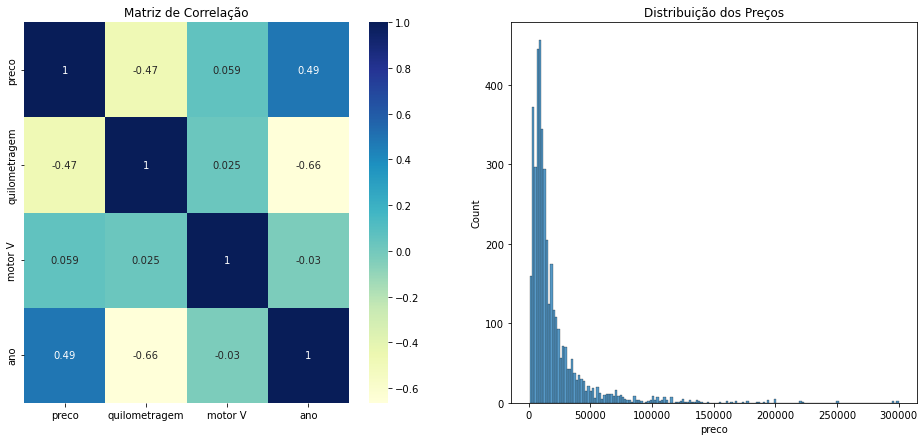

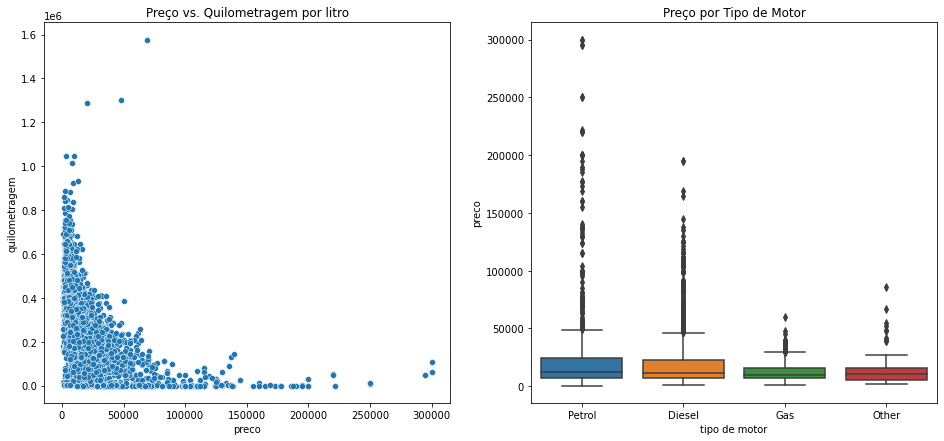

Gráfico sobre preço com visualização melhorada


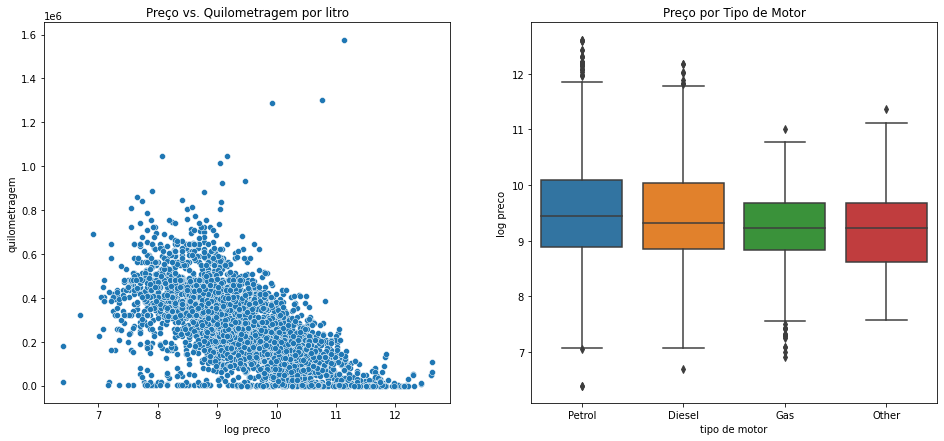

In [5]:
#Sua resposta aqui
plt.figure(figsize=[16,7])

plt.subplot(1, 2, 1)
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title('Matriz de Correlação')

plt.subplot(1, 2, 2)
sns.histplot(data=data, x="preco")
plt.title('Distribuição dos Preços')
plt.show()

################################################################

plt.figure(figsize=[16,7])

plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x="preco", y="quilometragem")
plt.title('Preço vs. Quilometragem por litro')

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x="tipo de motor", y="preco")
plt.title('Preço por Tipo de Motor')
plt.show()

################################################################
## melhorar visualização do preço
logPreco = np.log(data['preco'])
data['log preco'] = logPreco
data = data.drop('preco',axis=1)

################################################################
print('\033[1m' + 'Gráfico sobre preço com visualização melhorada' + '\033[0m')
plt.figure(figsize=[16,7])

plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x="log preco", y="quilometragem")
plt.title('Preço vs. Quilometragem por litro')

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x="tipo de motor", y="log preco")
plt.title('Preço por Tipo de Motor')
plt.show()


## **Desenvolvimento do Modelo - 2 pontos**

4 - O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para responder a pergunta do desafio? Por quê? (1,0)

Resposta: É possível aplicar modelos de aprendizagem supervisionada de regressão para prever o preço de um carro com base em suas características, como marca, modelo, ano, quilometragem e etc.

5 - Qual a técnica sugerida para este projeto? Por quê? (1,0)

Resposta: a técnica sugerida para prever o preço de carros com base nos dados fornecidos é a regressão linear múltipla. Essa técnica permite modelar a relação entre várias variáveis independentes e a variável dependente (preço do carro) simultaneamente, o que pode fornecer uma previsão mais precisa.

Com base nas suas respostas, agora escolha dois algortimos para implementar e comparar a performance de cada um deles ao final do desafio.

Resposta:

Algoritmo 1: Ridge

Algoritmo 2: Random Forest

## **Treinamento e teste do Modelo - 3 pontos**

6 - Crie um subset dos dados que serão utilizados para o treinamento e para o teste do modelo. Divida este subset em treino e teste. (1,0) 

In [6]:
#Sua resposta aqui
dataDummies = pd.get_dummies(data, drop_first=True)

display(dataDummies.head())

x = dataDummies.drop('log preco', axis = 1)
y = dataDummies['log preco']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=2, random_state=366)


,quilometragem,motor V,ano,log preco,marca_BMW,marca_Mercedes-Benz,marca_Mitsubishi,marca_Renault,marca_Toyota,marca_Volkswagen,...,modelo_Vito,modelo_X1,modelo_X3,modelo_X5,modelo_X5 M,modelo_X6,modelo_X6 M,modelo_Yaris,modelo_Z3,modelo_Z4
0,445787.18,2.0,1991,8.342840,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,687188.18,2.9,1999,8.974618,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,576143.72,5.0,2003,9.495519,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,386241.60,4.2,2007,10.043249,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,193120.80,2.0,2011,9.814656,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


7 - Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

7.1 - Algoritmo 1: (0,5)


In [7]:
#Sua resposta aqui
ridge = Ridge(alpha=500).fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_rmse = mean_squared_error(y_test, ridge_pred, squared=False)


print(f"Ridge R2-score: {round(ridge_r2, 2)}")
print(f"Ridge RMSE: {round(ridge_rmse, 2)}")

Ridge R2-score: 0.95
Ridge RMSE: 0.12


7.2 - Algoritmo 2:  (0,5)

In [8]:
#Sua resposta aqui
rf = RandomForestRegressor(n_estimators=70, random_state=42).fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print(f"Random Forest R2-score: {round(rf_r2, 2)}")
print(f"Random Forest RMSE: {round(rf_rmse, 2)}")

Random Forest R2-score: 0.98
Random Forest RMSE: 0.07


7.3 - Qual dos algortimos obteve melhor resultado? Por quê? (1,0)

Resposta: O modelo Random Forest é melhor porque apresentou um valor de R2-score mais próximo de 1, indicando que ele consegue explicar uma maior variação nos dados. Além disso, ele apresentou um valor de RMSE menor, o que indica que ele tem menor erro na predição dos valores.

## **Modelo de Produção: Teste com novos dados - 1 ponto**

8 - Use o seu modelo treinado para responder a pergunta do desafio:

In [9]:
#Sua resposta aqui
challenge = data.to_dict('records')
challenge.append(
    {
        'marca':'Volkswagen', 
        'tipo': 'sedan', 
        'quilometragem': 172095,
        'motor V': 2.0,
        'tipo de motor': 'Gas',
        'cadastrado': 'yes',
        'ano': 2005,
        'modelo': 'Polo'
    }
)

challenge = pd.DataFrame(challenge)
challenge_dummies = pd.get_dummies(challenge, drop_first=True)

carro = challenge_dummies.tail(1)
carro = carro.to_dict('records')[0]

dataNovo = pd.DataFrame(carro, index=[0])
dataNovo = dataNovo.drop('log preco', axis = 1)

predicao = rf.predict(dataNovo)
preco = predicao[0]

preco = np.exp(preco)

print(f'O preço do Polo é de U$ {round(preco, 2)}')

O preço do Polo é de U$ 9131.79
